References :

Chapter 3 (Synapses) and 8 (noisy inputs) of Gerstner Book
https://neuronaldynamics.epfl.ch/online/Ch3.S1.html

Chapter 5.8 Synaptic Conductances of Dayan and Abbott book
https://github.com/SWARAJkumar/Computational-Neuroscience/blob/master/Theoretical%20Neuroscience%20Computational%20and%20Mathematical%20Modeling%20of%20Neural%20Systems%20-%20%20Peter%20Dayan%2C%20L.%20F.%20Abbott.pdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1- Simulating the Hodgkin-Huxley model**

By recording axons from a giant squid, Hodgkin and Huxley blocked voltage-dependent sodium current and voltage-dependent potassium current to retrieve the ODEs for the opening and closure of the (non-blocked) current.


\begin{equation}
C \frac{dV}{dt} = -(g_{leak}(V(t)-V_{leak})+g_{Na}m^3(V)h(V)(V(t)-V_{Na}) +g_{K}n^4(V)(V(t)-V_{K})) + I(t)
\end{equation}
with
\begin{equation}
\tau_m \frac{dm}{dt} = m_{∞}-m(V)
\\
\tau_h \frac{dh}{dt} = h_{∞}-h(V)
\\
\tau_n \frac{dn}{dt} = n_{∞}-n(V)
\end{equation}

Hodgkin and Huxely applied a voltage "clamp" V_1 to the axon and recorded the current, e.g.

\begin{equation}
I_K = g_{K}n^4(V)(V(t)-V_{K}))
\end{equation}

By dividing I_K by (V(t)-V_{K})) one can obtain g_{K}n^4(t) as a function of V_1. By integrating the activation function (e.g. n(t) ) one can show that :

\begin{equation}
n(t) = n(V_1) + (n(V_{rest}) -n(V_1)) exp (\frac{-(t-t_0)}{\tau_n(V_1)})
\end{equation}

They repeated the experiment for different values of V_1 and solved the ODEs (by hand !).

In [ ]:

def alpha_n(a):
    return np.divide(0.04*(a-25),1-np.exp(-(a-25)/9))

def beta_n(a):
    return np.divide(-0.004*(a-25),1-np.exp((a-25)/9))

def alpha_m(a):
    return np.divide(-0.32*(a+37),np.exp(-(a+37)/4)-1);

def beta_m(a):
    return np.divide(0.28*(a+10),np.exp((a+10)/5)-1);

def alpha_h(a):
    return 0.128*np.exp(-(a+33)/18);

def beta_h(a):
    return np.divide(4,1+np.exp(-(a+10)/5));

def dVdt(V,m,h,n,gL,gNa,gK,VNa,VK,VL,Iinj):
    return -(gL*(V-VL) + gNa*m*m*m*h*(V-VNa) + gK*n*n*n*n*(V-VK))+Iinj

def dVdtnoise(V,m,h,n,x,y,gL,gNa,gK,gAMPA,gGABA,VNa,VK,VL,VAMPA,Iinj):
    return -(gL*(V-VL) + gNa*m*m*m*h*(V-VNa) + gK*n*n*n*n*(V-VK) + gAMPA*x*(V-VAMPA)+ gGABA*y*(V-VL))+Iinj


Text(0, 0.5, 'n^4')

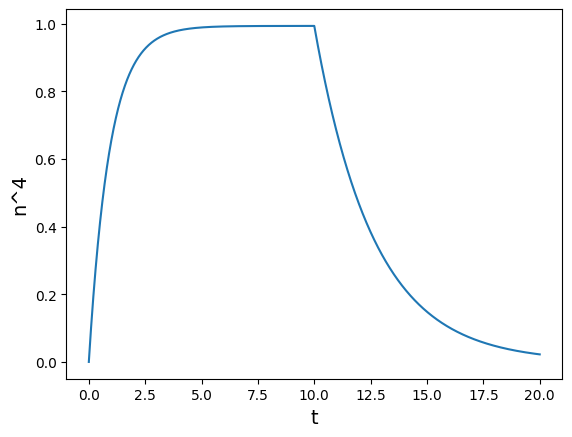

In [ ]:
delta = 0.01 # definition of Delta t
t_max = 20  # Maximal length of integration - final time
V_rest = -70;
V_1 = 50;
tstop = 10

x_num = []   # We will build here the numerical solution
t_num = []   # and here the time steps
# Initial conditions:
time = 0.
t_num.append(0.)
x_num.append(0.)

while (time < t_max):
        time += delta
        if time < tstop:
            V_m = V_1
        else :
            V_m = V_rest
        t_num.append(time)
        x_prev = x_num[-1]
        x_next = x_prev + (alpha_n(V_m)*(1-x_prev) - beta_n(V_m)*x_prev)*delta
        x_num.append(x_next)

plt.plot(t_num,x_num)

plt.xlabel('t', fontsize = 14)
plt.ylabel('n^4', fontsize = 14)

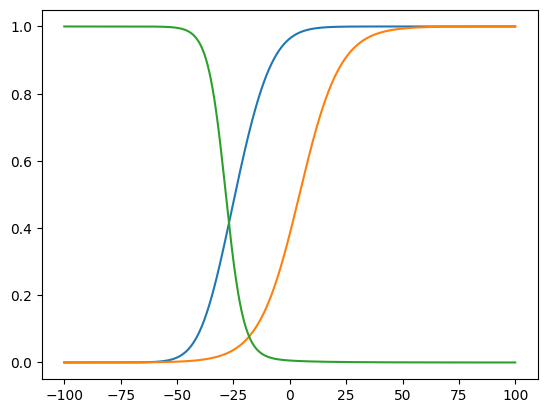

In [ ]:
x = np.arange(-100,100,.1)

n_inf = alpha_n(x)/(alpha_n(x)+beta_n(x))
m_inf = alpha_m(x)/(alpha_m(x)+beta_m(x))
h_inf = alpha_h(x)/(alpha_h(x)+beta_h(x))

plt.plot(x,m_inf)
plt.plot(x,n_inf)
plt.plot(x,h_inf)




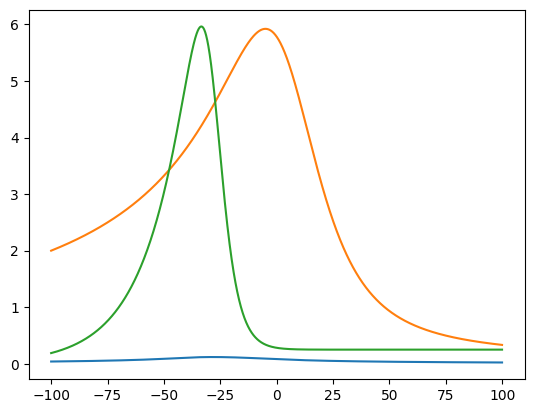

In [ ]:
x = np.arange(-100,100,.1)

n_tau = 1/(alpha_n(x)+beta_n(x))
m_tau = 1/(alpha_m(x)+beta_m(x))
h_tau = 1/(alpha_h(x)+beta_h(x))

plt.plot(x,m_tau)
plt.plot(x,n_tau)
plt.plot(x,h_tau)

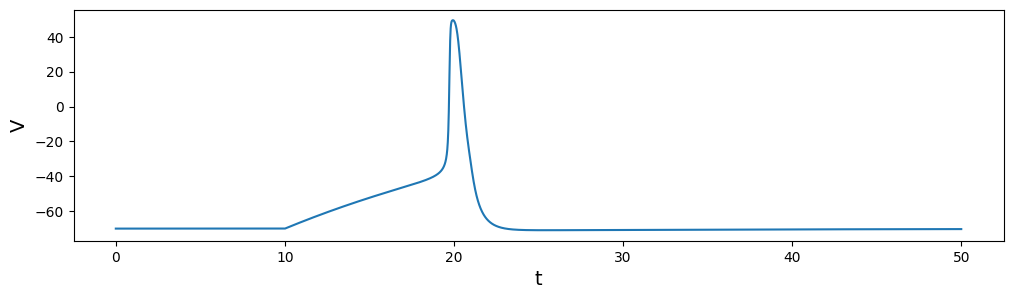

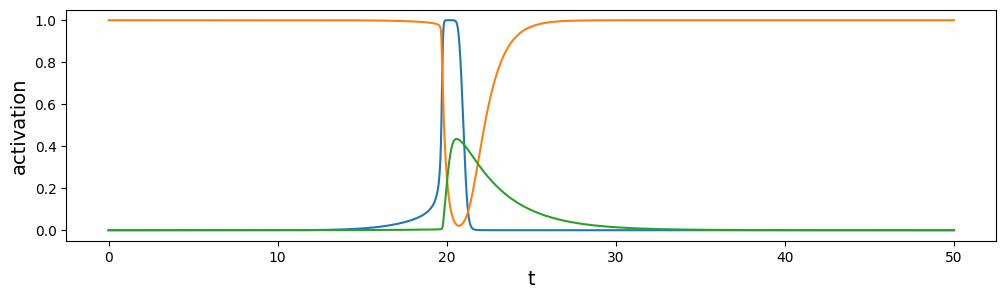

In [ ]:
delta = 0.01 # definition of Delta t
t_max = 50  # Maximal length of integration - final time
nt = t_max/delta;
tstart = 10/delta
tstop = 20/delta

Iinjmax = 4;
Iinjmin = 0;

time = np.arange(0,t_max,delta)

gL = 0.05;
gNa = 50;
gK = 50;
VNa = 50;
VK = -90;
VL = -70;

V_num = np.zeros((int(nt),1))
m_num = np.zeros((int(nt),1))
h_num = np.zeros((int(nt),1))
n_num = np.zeros((int(nt),1))

# Initial conditions:
V_num[0] = VL;
m_num[0] = alpha_m(VL)/(alpha_m(VL)+beta_m(VL)); # steady-state
h_num[0] = alpha_h(VL)/(alpha_h(VL)+beta_h(VL)); # steady-state
n_num[0] = alpha_n(VL)/(alpha_n(VL)+beta_n(VL)); # steady-state

for kt in range(1,int(nt)):
        if kt < tstop and kt > tstart :
            Iinj = Iinjmax
        else :
            Iinj = Iinjmin
        m_num[kt] = m_num[kt-1] + (alpha_m(V_num[kt-1])*(1-m_num[kt-1]) - beta_m(V_num[kt-1])*m_num[kt-1])*delta
        h_num[kt] = h_num[kt-1] + (alpha_h(V_num[kt-1])*(1-h_num[kt-1]) - beta_h(V_num[kt-1])*h_num[kt-1])*delta
        n_num[kt] = n_num[kt-1] + (alpha_n(V_num[kt-1])*(1-n_num[kt-1]) - beta_n(V_num[kt-1])*n_num[kt-1])*delta
        V_num[kt] = V_num[kt-1] + dVdt(V_num[kt-1],m_num[kt],h_num[kt],n_num[kt],gL,gNa,gK,VNa,VK,VL,Iinj)*delta

plt.figure(figsize=[12,3])
plt.plot(time,V_num)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,m_num)
plt.plot(time,h_num)
plt.plot(time,n_num)

plt.xlabel('t', fontsize = 14)
plt.ylabel('activation', fontsize = 14)
plt.show()

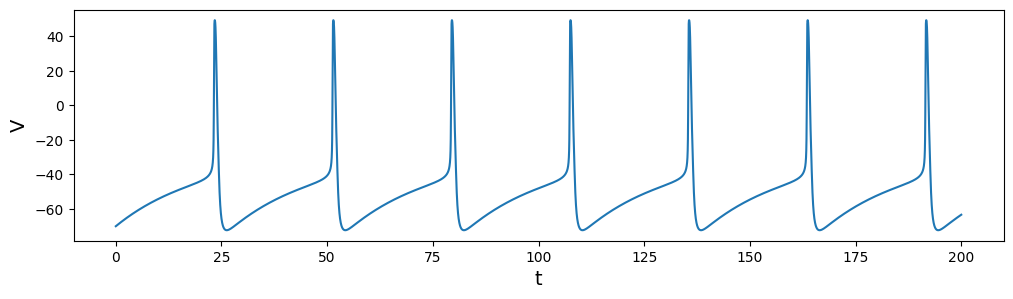

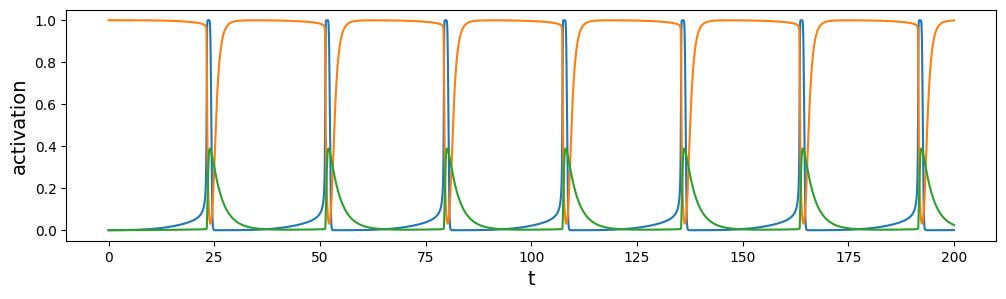

In [ ]:
delta = 0.01 # definition of Delta t
t_max = 200  # Maximal length of integration - final time
nt = t_max/delta;

time = np.arange(0,t_max,delta)

gL = 0.05;
gNa = 50;
gK = 100;
VNa = 50;
VK = -90;
VL = -70;
Iinj = 2;

V_num = np.zeros((int(nt),1))
m_num = np.zeros((int(nt),1))
h_num = np.zeros((int(nt),1))
n_num = np.zeros((int(nt),1))

# Initial conditions:
V_num[0] = VL;
m_num[0] = alpha_m(VL)/(alpha_m(VL)+beta_m(VL)); # steady-state
h_num[0] = alpha_h(VL)/(alpha_h(VL)+beta_h(VL)); # steady-state
n_num[0] = alpha_n(VL)/(alpha_n(VL)+beta_n(VL)); # steady-state

for kt in range(1,int(nt)):

        m_num[kt] = m_num[kt-1] + (alpha_m(V_num[kt-1])*(1-m_num[kt-1]) - beta_m(V_num[kt-1])*m_num[kt-1])*delta
        h_num[kt] = h_num[kt-1] + (alpha_h(V_num[kt-1])*(1-h_num[kt-1]) - beta_h(V_num[kt-1])*h_num[kt-1])*delta
        n_num[kt] = n_num[kt-1] + (alpha_n(V_num[kt-1])*(1-n_num[kt-1]) - beta_n(V_num[kt-1])*n_num[kt-1])*delta
        V_num[kt] = V_num[kt-1] + dVdt(V_num[kt-1],m_num[kt],h_num[kt],n_num[kt],gL,gNa,gK,VNa,VK,VL,Iinj)*delta

plt.figure(figsize=[12,3])
plt.plot(time,V_num)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,m_num)
plt.plot(time,h_num)
plt.plot(time,n_num)

plt.xlabel('t', fontsize = 14)
plt.ylabel('activation', fontsize = 14)
plt.show()

**2- Synapses and receptors**

Synaptic transmission at a spike-mediated chemical synapse begins when an action potential invades the presynaptic terminal and causes vesicles containing transmitter molecules to fuse with the cell membrane and release their contents into the synaptic cleft between the pre- and postsynaptic sides of the synapse.

The transmitter molecules then diffuse across the cleft and bind to receptors on the postsynaptic neuron. Binding of transmitter molecules leads to the opening of ion channels that modify the conductance of the postsynaptic neuron.

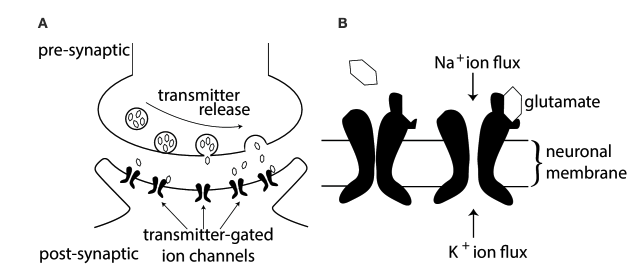

Simple model of a directly activated receptor channel:
- the transmitter interacts with the channel through a binding reaction in which transmitter molecules bind to a closed receptor and open it.
- in the reverse reaction, the transmitter molecules unbind from the receptor and it closes.
- these processes are analogous to the opening and closing involved in the gating of a voltage-dependent channel, and the same type of equation is used to describe how the open probability p changes with time:

\begin{equation}
\frac{dp}{dt} = \alpha(N)(1-p) - \beta p
\end{equation}

Note that, contrary to voltage-gated channels, alpha (opening rate) depends on transmitter concentration and beta is constant. Furthermore, alpha >> beta (when transmitter is present) :


Text(0, 0.5, 'P')

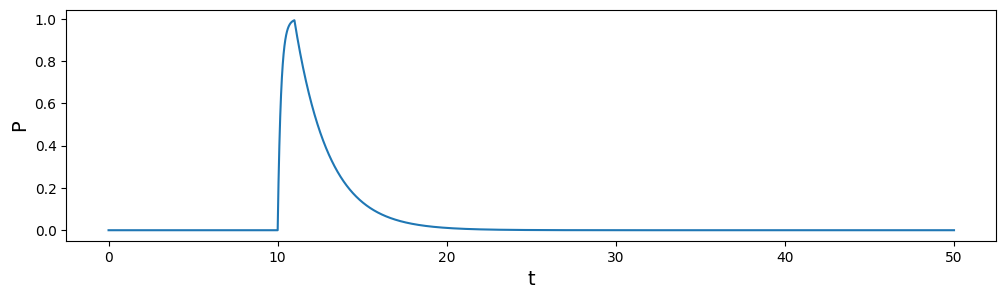

In [ ]:
alpha = 5
beta = 0.5
dt = 0.01 # definition of Delta t
t_max = 50  # Maximal length of integration - final time
nt = t_max/dt
tstart = 10/dt
tend = 11/dt
# tend = 10.5/dt
T = np.arange(0.,t_max,dt)
n_t = len(T)

P = np.zeros((int(nt),1))

for kt in range(1,int(nt)):
        if kt > tstart and kt < tend :
          P[kt] = P[kt-1] + alpha*(1-P[kt-1]) * dt
        else:
          P[kt] = P[kt-1] - beta*(P[kt-1]) * dt


plt.figure(figsize=[12,3])
plt.plot(T,P)
plt.xlabel('t', fontsize = 14)
plt.ylabel('P', fontsize = 14)

We can consider the neurotransmitter density to be instantaneous compared to the evolution of the other variables:
- the transmitter concentration in the synaptic cleft rises extremely rapidly after vesicle release
- diffusion out of the cleft, enzyme-mediated degradation, and presynaptic uptake mechanisms  all contribute to a rapid reduction of the transmitter concentration.

This can be formalized as:

\begin{equation}
\frac{dp}{dt} = \alpha(\sum_{s} \delta(t-t_{s}))(1-p) - \beta p
\end{equation}

where 𝛿(𝑡) is called the Dirac 𝛿-function: 𝛿(𝑥)=0 for 𝑥≠0 and 𝛿(𝑥)=1 for 𝑥=0; i.e. it is 1 when there is an action potential and 0 otherwise.


Text(0, 0.5, 'P')

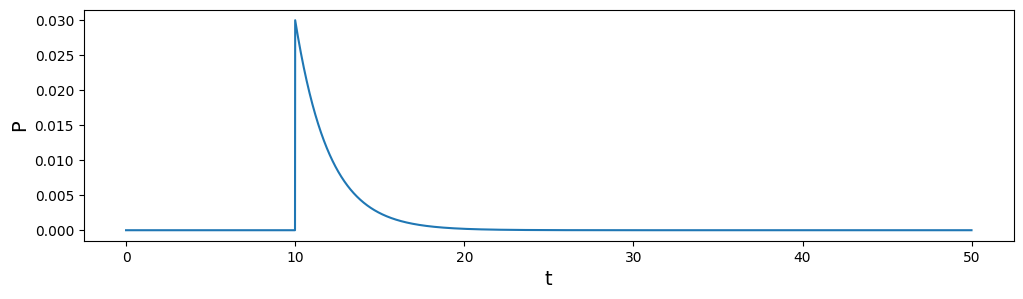

In [ ]:
P = np.zeros((int(nt),1))
delta_step = 3

for kt in range(1,int(nt)):
        if kt == tstart:
          P[kt] = P[kt-1] + delta_step*(1-P[kt-1])* dt
        else:
          P[kt] = P[kt-1] - beta*(P[kt-1]) * dt

plt.figure(figsize=[12,3])
plt.plot(T,P)
plt.xlabel('t', fontsize = 14)
plt.ylabel('P', fontsize = 14)

Excitatory neurons mainly release glutamate, which activates mainly AMPA and NMDA receptors (but also kainate-R). Inhibitory neurons mainly release GABA, which activates mainly GABA_A receptors (but also GABA_B).

AMPA-R are fast ionotropic (channel-) receptors that can be modeled with

\begin{equation}
\frac{dp}{dt} = \alpha(\sum_{s} \delta(t-t_{s}))(1-p) - \beta p
\end{equation}

and


\begin{equation}
I_{AMPA} = g_{AMPA} p(t) (V{m}(t) - V_{AMPA})
\end{equation}

where V_{AMPA} = 0 mV.

Upon the arrival of a presynaptic spike :


Text(0, 0.5, 'I AMPA')

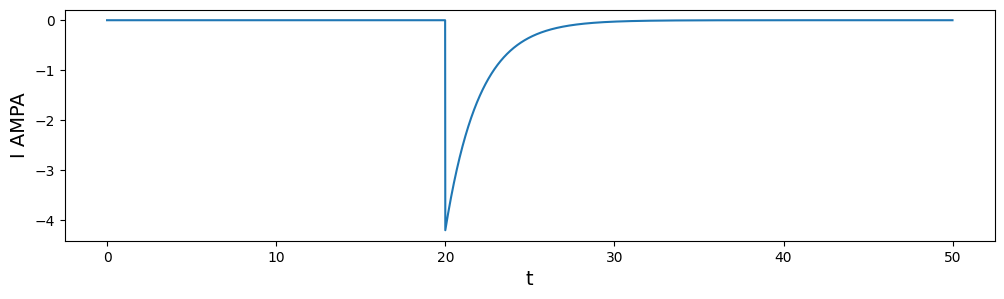

In [ ]:
P = np.zeros((int(nt),1))
V = np.zeros((int(nt),1))-70
I_AMPA = np.zeros((int(nt),1))

gAMPA = 2
VAMPA = 0

tstart = int(20/dt)
T_PA = np.zeros((int(nt),1))
T_PA[tstart] = 1;

for kt in range(1,int(nt)):

        P[kt] = P[kt-1]+ (T_PA[kt]*delta_step*(1-P[kt-1]) - beta*(P[kt-1])) * dt
        I_AMPA[kt] = gAMPA*P[kt]*(V[kt]-VAMPA)


plt.figure(figsize=[12,3])
plt.plot(T,I_AMPA)
plt.xlabel('t', fontsize = 14)
plt.ylabel('I AMPA', fontsize = 14)


Consequences on the membrane potential : Excitatory Post-Synaptic Potential

Text(0, 0.5, 'V')

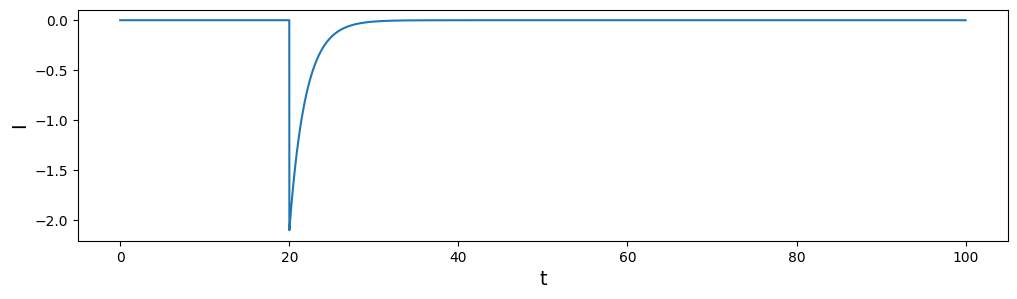

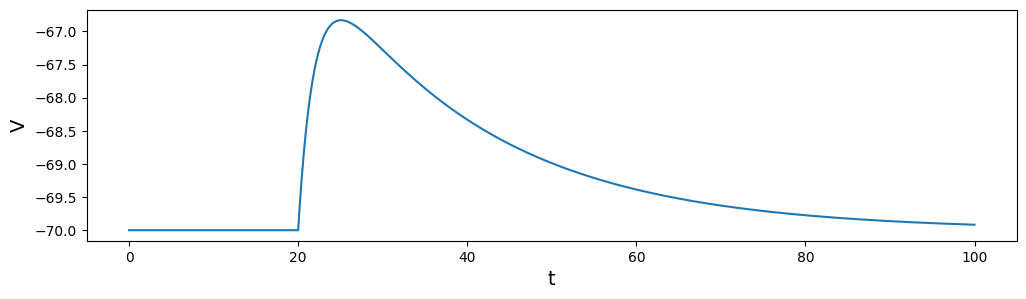

In [ ]:
t_max = 100  # Maximal length of integration - final time
dt = 0.01
T = np.arange(0.,t_max,dt)
nt = len(T)
tstart = int(20/dt)
T_PA = np.zeros((int(nt),1))
T_PA[tstart] = 1;

gL = 0.05;
gNa = 50;
gK = 50;
VNa = 50;
VK = -90;
VL = -70;
Iinj = 0
gAMPA = 1 #1.5
beta = 0.5
delta_step = 3

I_AMPA = np.zeros((int(nt),1))
I_Na = np.zeros((int(nt),1))
I_K = np.zeros((int(nt),1))
I_L = np.zeros((int(nt),1))

V = np.zeros((int(nt),1))-70
P = np.zeros((int(nt),1))
m = np.zeros((int(nt),1))
h = np.zeros((int(nt),1))
n = np.zeros((int(nt),1))

for kt in range(1,int(nt)):
        I_AMPA[kt] = gAMPA*P[kt-1]*(V[kt-1]-VAMPA)
        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)
        V[kt] = V[kt-1] + (-I_L[kt] - I_AMPA[kt] - I_Na[kt] - I_K[kt] +Iinj)*dt #

        P[kt] = P[kt-1]+ (T_PA[kt]*delta_step*(1-P[kt-1]) - beta*(P[kt-1])) * dt
        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*dt
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*dt
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*dt

plt.figure(figsize=[12,3])
plt.plot(T,I_AMPA)
plt.xlabel('t', fontsize = 14)
plt.ylabel('I', fontsize = 14)

plt.figure(figsize=[12,3])
plt.plot(T,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)

How can we determine gAMPA and VAMPA experimentally ?

Text(0, 0.5, 'I')

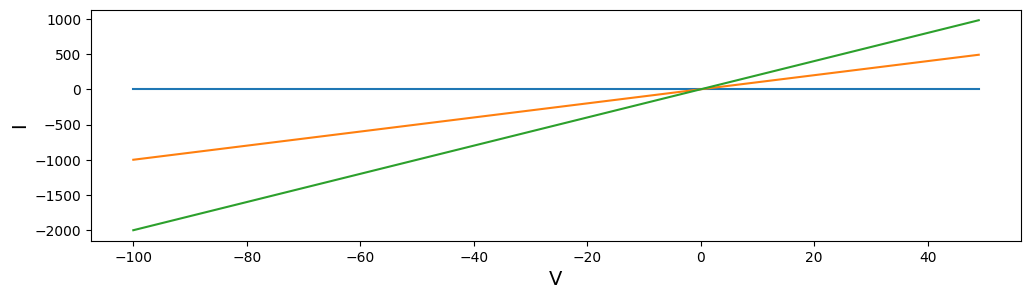

In [ ]:
Vk = np.zeros(150)
Ik = np.zeros(150)
VAMPA = 0

plt.figure(figsize=[12,3])
for g in range(0,3):
  gAMPA = g*10
  for kV in range(0,150):
    Vk[kV] = -100+kV
    Ik[kV] = gAMPA*(Vk[kV]-VAMPA)
  plt.plot(Vk,Ik)
plt.xlabel('V', fontsize = 14)
plt.ylabel('I', fontsize = 14)

Text(0, 0.5, 'I')

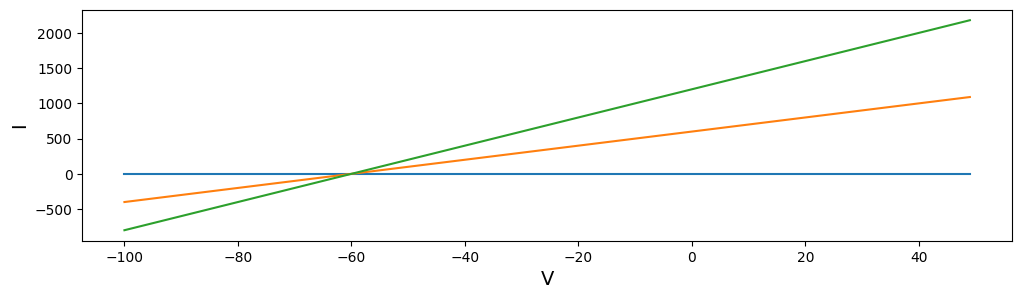

In [ ]:
Vk = np.zeros(150)
Ik = np.zeros(150)
Vg = -60

plt.figure(figsize=[12,3])
for g in range(0,3):
  gg = g*10
  for kV in range(0,150):
    Vk[kV] = -100+kV
    Ik[kV] = gg*(Vk[kV]-Vg)
  plt.plot(Vk,Ik)
  plt.xlabel('V', fontsize = 14)
plt.ylabel('I', fontsize = 14)

If the presynaptic neuron is inhibitory, GABA is released and activates GABA_A receptors that are characterized by:
- VGABA = -60
- beta_GABA = 0.1

What will be the net effect ? The time course ?


Text(0, 0.5, 'I')

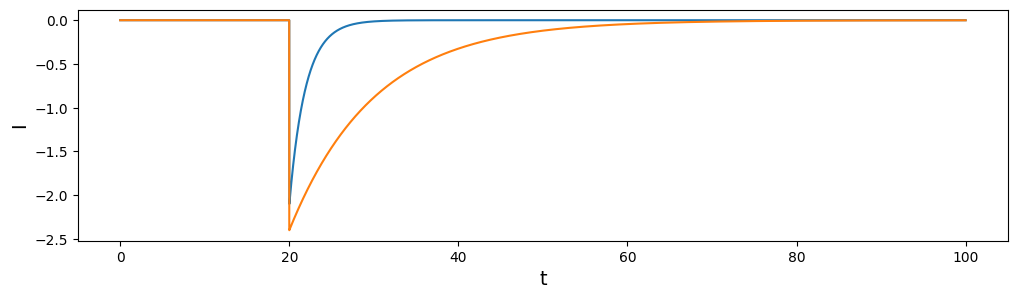

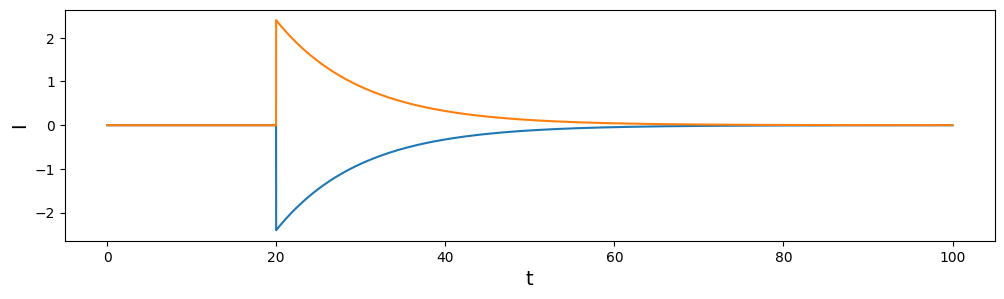

In [ ]:
P = np.zeros((int(nt),1))
V = np.zeros((int(nt),1))-70 #50
I_GABA = np.zeros((int(nt),1))

gGABA = 8
VGABA = -60
beta_gaba = 0.1

for kt in range(1,int(nt)):

        P[kt] = P[kt-1]+ (delta_step*T_PA[kt]*(1-P[kt-1]) - beta_gaba*(P[kt-1])) * dt
        I_GABA[kt] = gGABA*P[kt]*(V[kt]-VGABA)

plt.figure(figsize=[12,3])
plt.plot(T,I_AMPA)
plt.plot(T,I_GABA)
plt.xlabel('t', fontsize = 14)
plt.ylabel('I', fontsize = 14)

P = np.zeros((int(nt),1))
V = np.zeros((int(nt),1))-50
I_GABA2 = np.zeros((int(nt),1))
for kt in range(1,int(nt)):

        P[kt] = P[kt-1]+ (delta_step*T_PA[kt]*(1-P[kt-1]) - beta_gaba*(P[kt-1])) * dt
        I_GABA2[kt] = gGABA*P[kt]*(V[kt]-VGABA)

plt.figure(figsize=[12,3])
plt.plot(T,I_GABA)
plt.plot(T,I_GABA2)
plt.xlabel('t', fontsize = 14)
plt.ylabel('I', fontsize = 14)

So it is only true if V is held constant. Taking into account the influence of GABA on membrane potential gives :

Text(0, 0.5, 'V')

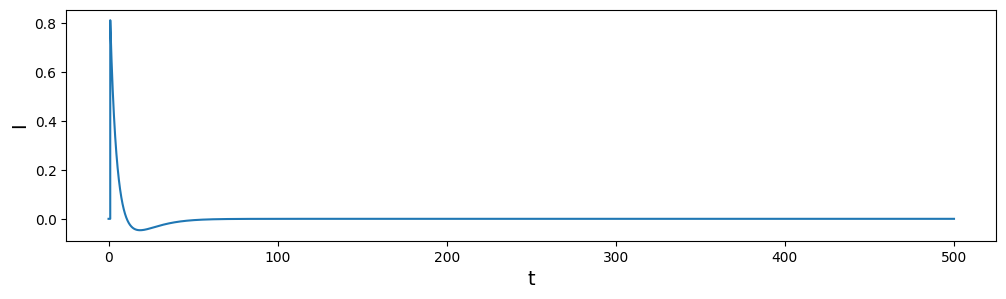

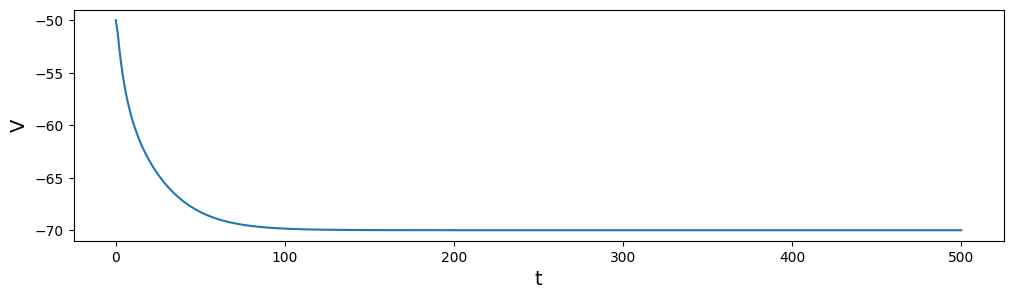

In [ ]:
t_max = 500  # Maximal length of integration - final time
dt = 0.01
T = np.arange(0.,t_max,dt)
nt = len(T)
tstart = int(1/dt)
T_PA = np.zeros((int(nt),1))
T_PA[tstart] = 1;
Iinj = 0# 0.2# 1.3#

P = np.zeros((int(nt),1))
V = np.zeros((int(nt),1))-50 #70
I_GABA = np.zeros((int(nt),1))
m = np.zeros((int(nt),1))
h = np.zeros((int(nt),1))
n = np.zeros((int(nt),1))
I_Na = np.zeros((int(nt),1))
I_K = np.zeros((int(nt),1))
I_L = np.zeros((int(nt),1))

gGABA = 3
VGABA = -60
beta_gaba = 0.1

for kt in range(1,int(nt)):

        I_GABA[kt] = gGABA*P[kt-1]*(V[kt-1]-VGABA)
        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)
        V[kt] = V[kt-1] + (-I_L[kt]-I_Na[kt]-I_K[kt] - I_GABA[kt] +Iinj)*dt #
        P[kt] = P[kt-1]+ (delta_step*T_PA[kt]*(1-P[kt-1]) - beta_gaba*(P[kt-1])) * dt

        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*dt
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*dt
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*dt

plt.figure(figsize=[12,3])
plt.plot(T,I_GABA)
plt.xlabel('t', fontsize = 14)
plt.ylabel('I', fontsize = 14)

plt.figure(figsize=[12,3])
plt.plot(T,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)


The NMDA receptor has a particularity, it is both activated by glutamate (like the AMPA receptor) and sensitive to membrane potential (due to a magnesium ion blocking the channel pore).


Text(0, 0.5, 'I')

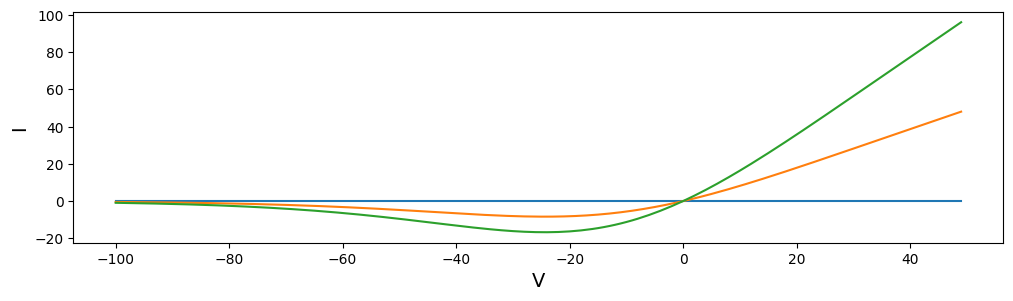

In [ ]:
Vk = np.zeros(150)
Ik = np.zeros(150)
Vnmda = 0

plt.figure(figsize=[12,3])
for g in range(0,3):
  gg = g
  for kV in range(0,150):
    Vk[kV] = -100+kV
    MgNmda = (1/(1 + np.exp(-(Vk[kV]+14)/16)))  # voltage sensitivity
    Ik[kV] = gg*MgNmda*(Vk[kV]-Vnmda)

  plt.plot(Vk,Ik)
  plt.xlabel('V', fontsize = 14)
plt.ylabel('I', fontsize = 14)

How does it impact the effective (observed at a given V) gNMDA ?

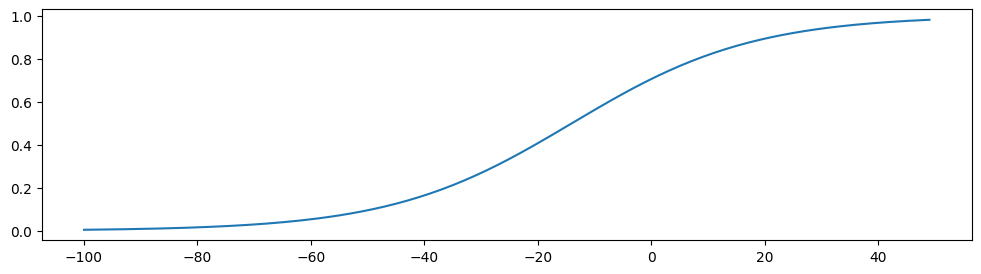

In [ ]:
Vk = np.zeros(150)
gNeff = np.zeros(150)
Vnmda = 0

plt.figure(figsize=[12,3])
gg = 1
for kV in range(0,150):
    Vk[kV] = -100+kV
    MgNmda = (1/(1 + np.exp(-(Vk[kV]+14)/16)))
    gNeff[kV] = gg*MgNmda

plt.plot(Vk,gNeff)
plt.xlabel('V', fontsize = 14)
plt.ylabel('Effective g', fontsize = 14)

Consequence on Vm ?

Text(0, 0.5, 'V')

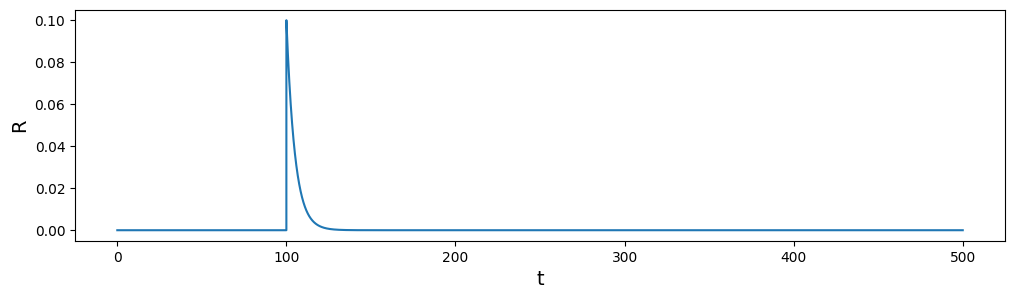

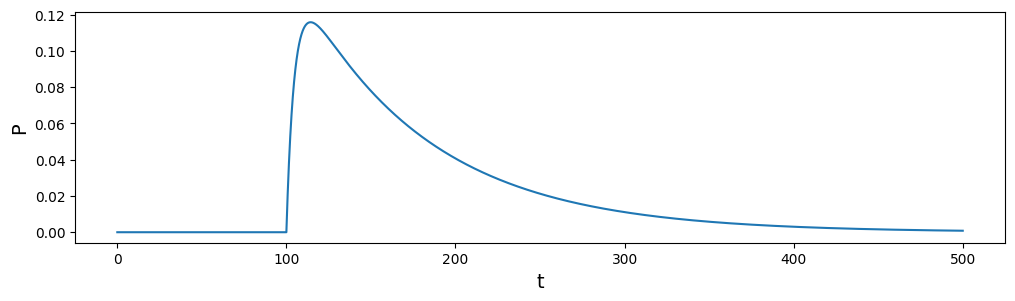

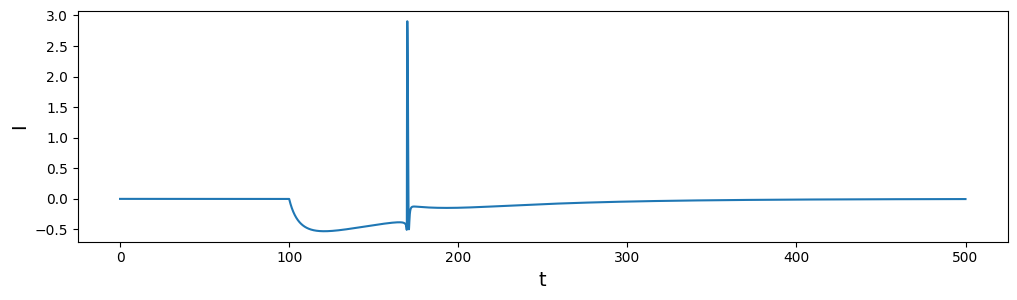

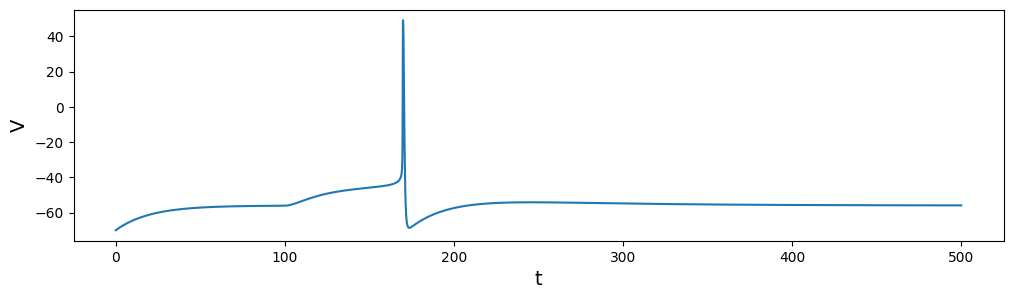

In [ ]:
t_max = 500  # Maximal length of integration - final time
dt = 0.01
T = np.arange(0.,t_max,dt)
nt = len(T)
tstart = int(100/dt)
T_PA = np.zeros((int(nt),1))
T_PA[tstart] = 1;

gL = 0.05;
gNa = 50;
gK = 50;
VNa = 50;
VK = -90;
VL = -70;
Iinj = 0.7
gNmda = 1
VNmda = 0

alpha_nmda = 0.3
beta_nmda = 0.013
beta_Rnmda = 0.2
delta_step = 10

I_Nmda = np.zeros((int(nt),1))
I_Na = np.zeros((int(nt),1))
I_K = np.zeros((int(nt),1))
I_L = np.zeros((int(nt),1))

V = np.zeros((int(nt),1))-70
R = np.zeros((int(nt),1))
P = np.zeros((int(nt),1))
m = np.zeros((int(nt),1))
h = np.zeros((int(nt),1))
n = np.zeros((int(nt),1))

for kt in range(1,int(nt)):
        MgNmda = (1/(1 + np.exp(-(V[kt-1]+14)/16)))

        I_Nmda[kt] = gNmda*P[kt-1]*MgNmda*(V[kt-1]-VNmda)

        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)
        V[kt] = V[kt-1] + (-I_L[kt] - I_Nmda[kt] - I_Na[kt] - I_K[kt] +Iinj)*dt #

        R[kt] = R[kt-1] + (T_PA[kt]*delta_step - beta_Rnmda*(R[kt-1])) * dt
        P[kt] = P[kt-1] + (alpha_nmda*R[kt]*(1-P[kt-1]) - beta_nmda*(P[kt-1])) * dt

        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*dt
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*dt
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*dt

plt.figure(figsize=[12,3])
plt.plot(T,R)
plt.xlabel('t', fontsize = 14)
plt.ylabel('R', fontsize = 14)

plt.figure(figsize=[12,3])
plt.plot(T,P)
plt.xlabel('t', fontsize = 14)
plt.ylabel('P', fontsize = 14)


plt.figure(figsize=[12,3])
plt.plot(T,I_Nmda)
plt.xlabel('t', fontsize = 14)
plt.ylabel('I', fontsize = 14)
plt.figure(figsize=[12,3])
plt.plot(T,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)



**3-  Summation and synaptic "noise"**

Upon the arrival of a train of presynaptic spikes :


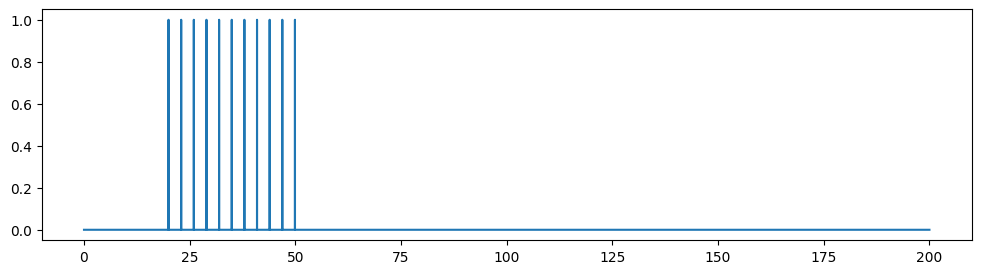

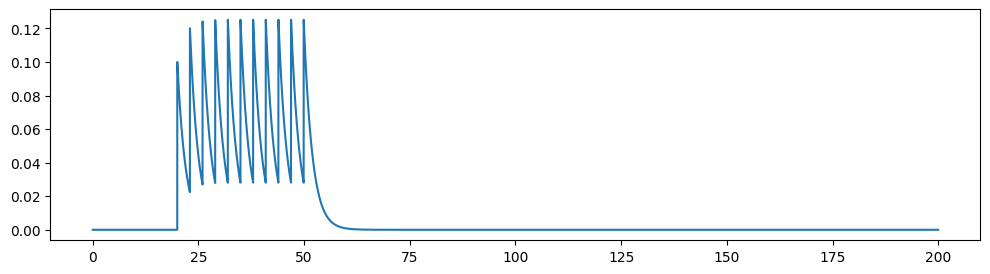

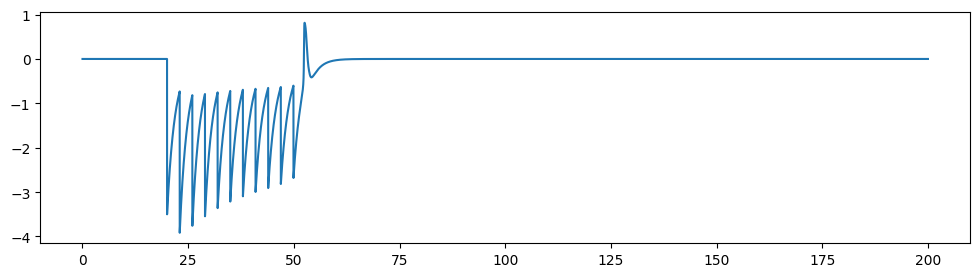

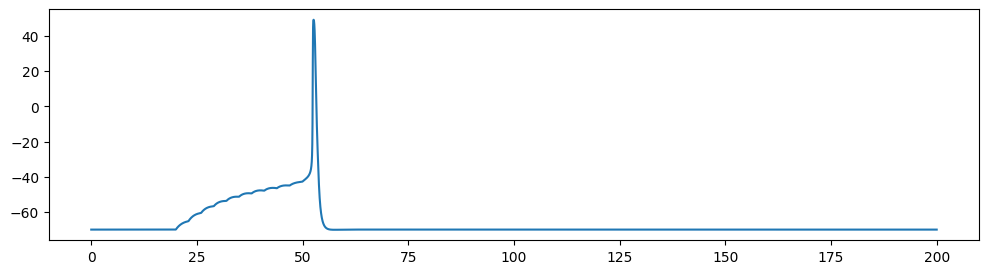

In [ ]:
t_max = 200  # Maximal length of integration - final time
dt = 0.01
T = np.arange(0.,t_max,dt)
nt = len(T)

tstart = int(20/dt)
tend = int(50/dt)
interval = int(3//dt) #10

T_PA = np.zeros((int(nt),1))
for kPA in range(tstart,tend,interval):
  T_PA[kPA] = 1;

gL = 0.05;
gNa = 50;
gK = 50;
VNa = 50;
VK = -90;
VL = -70;
Iinj = 0
gAMPA = 0.5
VAMPA = 0
delta_step = 10

I_AMPA = np.zeros((int(nt),1))
I_Na = np.zeros((int(nt),1))
I_K = np.zeros((int(nt),1))
I_L = np.zeros((int(nt),1))

V = np.zeros((int(nt),1))-70
P = np.zeros((int(nt),1))
m = np.zeros((int(nt),1))
h = np.zeros((int(nt),1))
n = np.zeros((int(nt),1))

for kt in range(1,int(nt)):
        I_AMPA[kt] = gAMPA*P[kt-1]*(V[kt-1]-VAMPA)
        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)
        V[kt] = V[kt-1] + (-I_L[kt] - I_AMPA[kt] - I_Na[kt] - I_K[kt] +Iinj)*dt #

        P[kt] = P[kt-1] + (T_PA[kt]*delta_step*(1-P[kt-1]) - beta*(P[kt-1])) * dt
        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*dt
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*dt
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*dt

plt.figure(figsize=[12,3])
plt.plot(T,T_PA)
plt.figure(figsize=[12,3])
plt.plot(T,P)
plt.figure(figsize=[12,3])
plt.plot(T,I_AMPA)
plt.figure(figsize=[12,3])
plt.plot(T,V)

In th brain, neurons can receive signals from ~10000 presynaptic neurons. How can we model this ?

- we can simplify/assume that presynaptic neurons fire independently
- so we need to build a spike train for 1 neuron
- again, let's assume spiking is stochastic. If a neuron fires on average at X Hz, the probability that it fires (or not) at a given (small) time bin is small. What kind of distribution will it follow ?


45
1000000


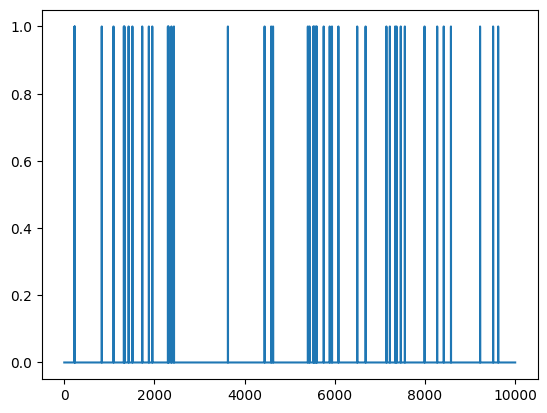

In [ ]:
f_Ext_AMPA = 5/1000 # Feed-Forward Excitatory Frequency [Hz to ms-1]
t_max = 10*1000
T = np.arange(0.,t_max,dt)
n_t = len(T)

# AP Time Bin Probability
p_FF_AMPA = f_Ext_AMPA * dt

spikes = np.random.poisson(f_Ext_AMPA *dt , n_t )

plt.plot(T,spikes)
print(sum(spikes))
print(n_t)


Let's check the distribution of inter-spike intervals (i.e. the duration, or time interval, between two consecutive spikes) :

(array([10., 10.,  6.,  3.,  2.,  3.,  1.,  0.,  2.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.,
        550., 600., 650., 700., 750., 800., 850., 900., 950.]),
 <BarContainer object of 19 artists>)

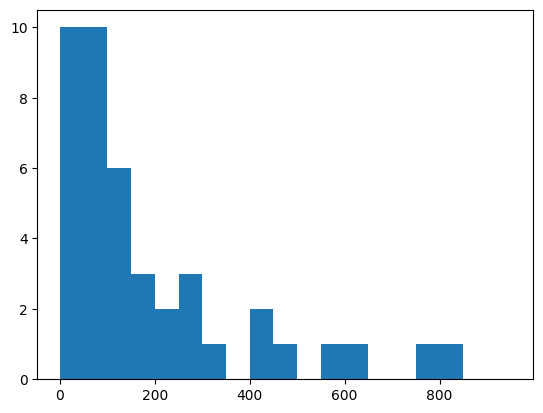

In [ ]:
tall = np.nonzero(spikes)
tPA, = tall
ISI = (tPA[1:-1]-tPA[0:-2])*dt
bins = range(0,1000,50)
plt.hist(ISI,bins)

In such a Poisson process, the probability that an action potential occurs at a given time bin is independant from the occurence of action potential just before. But we know there is a refractory period. How can we fix this ?

(array([0., 0., 1., 3., 5., 1., 2., 4., 2., 0., 0., 2., 7., 2., 1., 2., 1.,
        5., 1., 3., 3., 2., 1., 2., 2., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500., 510., 520., 530., 540.,
        550., 560., 570., 580., 590., 600., 610., 620., 630., 640., 650.,
        660., 670., 680., 690., 700., 710., 720., 730., 740., 750., 760.,
        770., 780., 790., 800., 810.

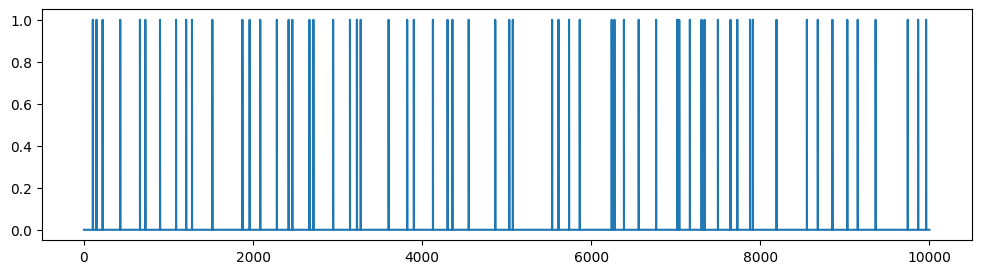

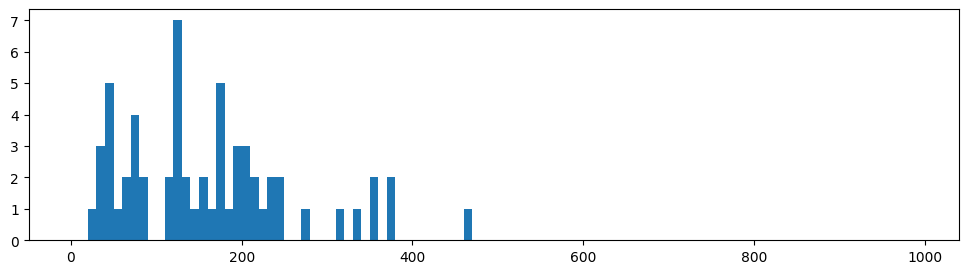

In [ ]:
f_Ext_AMPA = 5/1000 # Feed-Forward Excitatory Frequency [Hz to ms-1]
t_max = 10*1000
T = np.arange(0.,t_max,dt)
n_t = len(T)

# AP Time Bin Probability
p_FF_AMPA = f_Ext_AMPA * dt

spikes = np.random.poisson(2*f_Ext_AMPA *dt , n_t )
tall = np.nonzero(spikes)
tPA, = tall

for i in range(0, len(tPA),2):
    spikes[tPA[i]] = 0

plt.figure(figsize=[12,3])
plt.plot(T,spikes)

tall = np.nonzero(spikes)
tPA, = tall

ISI = (tPA[1:-1]-tPA[0:-2])*dt
bins = range(0,1000,10)

plt.figure(figsize=[12,3])
plt.hist(ISI,bins)

But if we consider a *population* of (independent) neurons, we can sum their contributions at each time bin as:

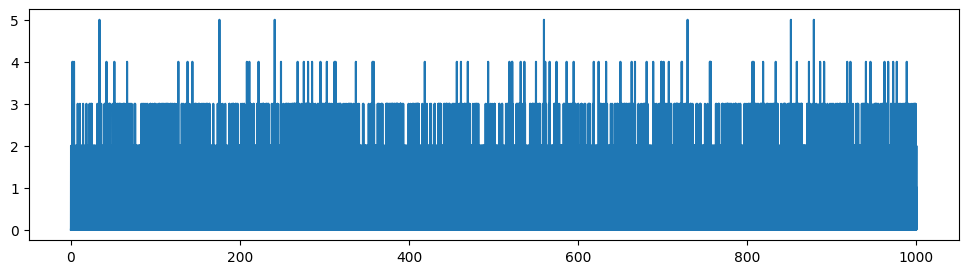

In [ ]:
f_Ext_AMPA = 5/1000 # Feed-Forward Excitatory Frequency [Hz to ms-1]
t_max = 1000
dt = 0.01
T = np.arange(0.,t_max,dt)
n_t = len(T)
nE = 8000

# AP Time Bin Probability
p_FF_AMPA = f_Ext_AMPA * dt

spikes = np.random.poisson(f_Ext_AMPA*nE *dt , n_t )
tall = np.nonzero(spikes)
tPA, = tall

plt.figure(figsize=[12,3])
plt.plot(T,spikes)


Now we could just consider that each spike from a realization of this Poisson distribution will open a small fraction of channels (that will subsequently close with exponential time course) with the generic equation

\begin{equation}
\frac{dp}{dt} = \alpha(\sum_{s} \delta(t-t_{s}))(1-p) - \beta p
\end{equation}

But this would be cumbersome. How can we simplify the summation between PPSE due to each spikes ?

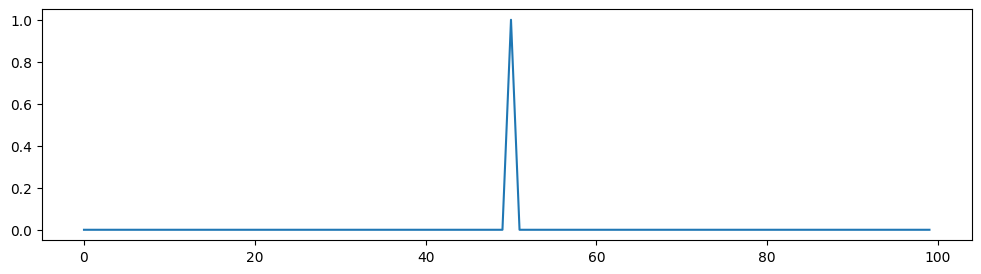

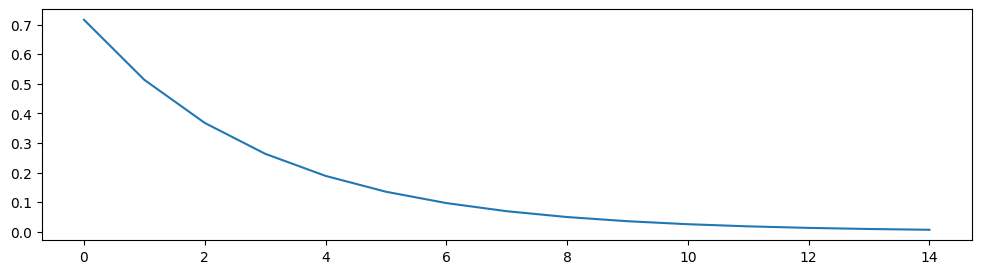

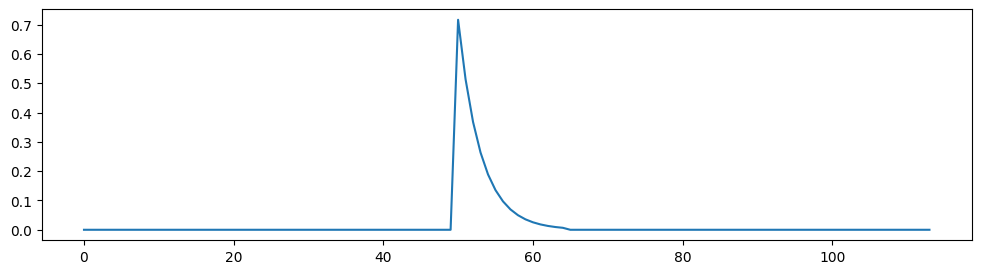

In [ ]:
nt = 100
delta = 1
tau = 3
x = np.zeros((int(nt)))
x[int(50/delta)] = 1
k = np.exp(-np.arange(delta, 5 * tau + delta, delta) / tau)

plt.figure(figsize=[12,3])
plt.plot(x)

plt.figure(figsize=[12,3])
plt.plot(k)

xconv = np.convolve(x, k, mode='full')
plt.figure(figsize=[12,3])
plt.plot(xconv)

Now we check that the convolution keeps the interesting properties regarding the summation between subsequent spikes:

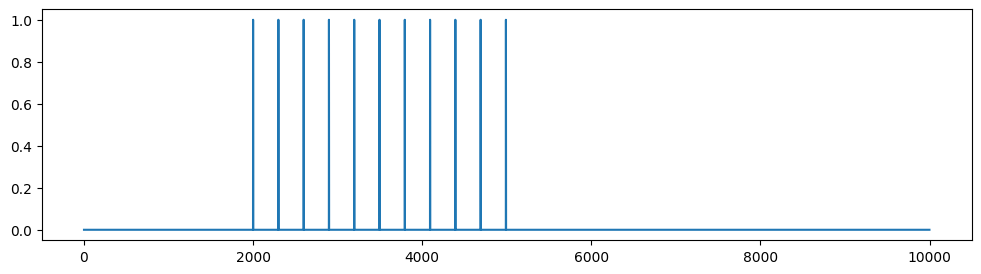

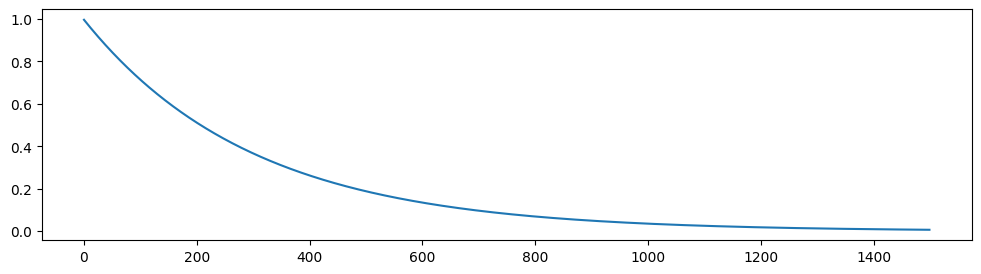

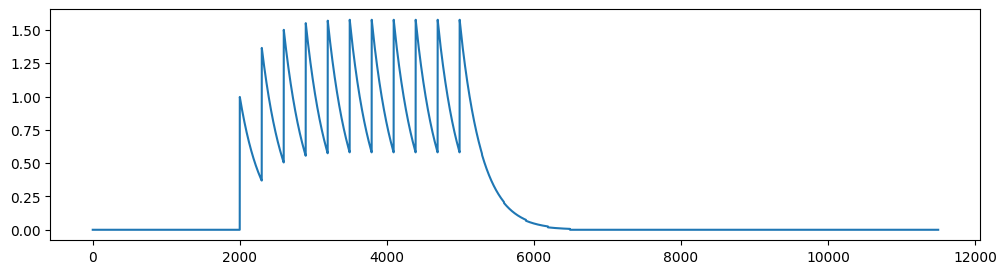

In [ ]:
tmax = 100
dt = 0.01

nt = tmax/dt
delta = 1
tau = 3/dt #10 for gaba
tstart = int(20/dt)
tend = int(50/dt)
interval = int(3//dt) #10 for higher spike frequency

T_PA = np.zeros((int(nt)))
for kPA in range(tstart,tend,interval):
  T_PA[kPA] = 1;

k = np.exp(-np.arange(delta, 5 * tau + delta, delta) / tau)

plt.figure(figsize=[12,3])
plt.plot(T_PA)

plt.figure(figsize=[12,3])
plt.plot(k)

xconv = np.convolve(T_PA, k, mode='full')
plt.figure(figsize=[12,3])
plt.plot(xconv)

We can now convolve (1) the stochastic (Poisson) spike train with (2) the exponential kernel to get an idea of the impact of presynaptic neurons on postysnaptic receptor-channels.

(Beware of side effects)

2995


Text(0, 0.5, 'P (Open Channels)')

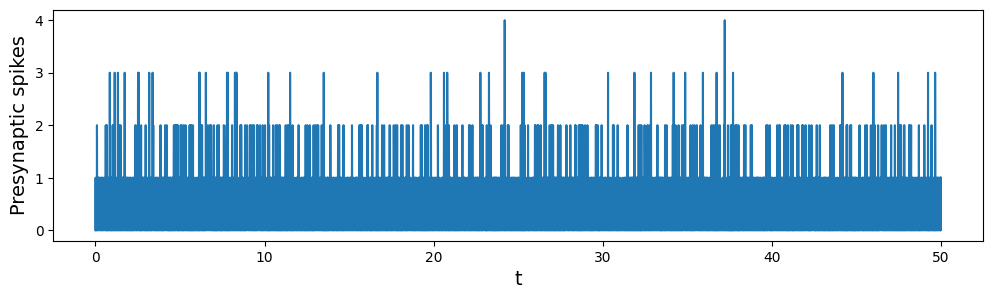

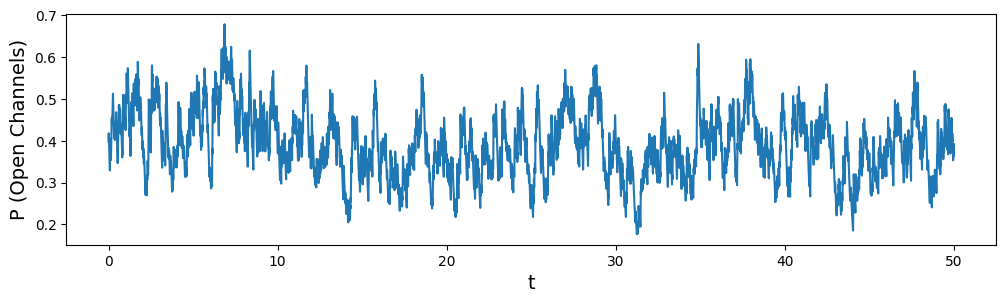

In [ ]:
t_max = 50
dt = 0.01
T = np.arange(0.,t_max,dt)
n_t = len(T)
nE = 8000
f_Ext_AMPA = 5
delta = 0.1
tau = 3 #10 for eg GABA

# AP Time Bin Probability
p_FF_AMPA = dt*f_Ext_AMPA/1000
spikes = np.random.poisson(p_FF_AMPA*nE, int(1.5 * n_t) )  # longer time window than the one to simulate
tall = np.nonzero(spikes)
tPA, = tall

print(np.sum(spikes))

plt.figure(figsize=[12,3])
plt.plot(T,spikes[int(0.25*n_t):int(1.25*n_t)])
plt.xlabel('t', fontsize = 14)
plt.ylabel('Presynaptic spikes', fontsize = 14)

k = np.exp(-np.arange(delta, 5 * tau + delta, delta) / tau)
k = k / np.sum(k)
xconv = np.convolve(spikes, k, mode='full')
xconv = xconv[int(0.25*n_t):int(1.25*n_t)] # cut the edges

plt.figure(figsize=[12,3])
plt.plot(T,xconv)

plt.xlabel('t', fontsize = 14)
plt.ylabel('P (Open Channels)', fontsize = 14)

Now that we're equipped with a model of synaptic noise, let's observe the neuron's reponse to AMPA + GABA noise.

In [ ]:
def function_stochastic_synapse(nE, f_AMPA, tau, num_time_steps, delta_t):

        p_FF_AMPA = dt*f_AMPA/1000
        spikes = np.random.poisson(p_FF_AMPA*nE, int(1.5 * num_time_steps) )
        # Kernel
        k = np.exp(-np.arange(delta_t, 5 * tau + delta_t, delta_t) / tau)
        k = k / np.sum(k)
        # Convolution
        x2 = np.convolve(spikes, k, mode='full')
        # Clipping
        x3 = x2[int(0.25*num_time_steps):int(1.25*num_time_steps)]
        return x3

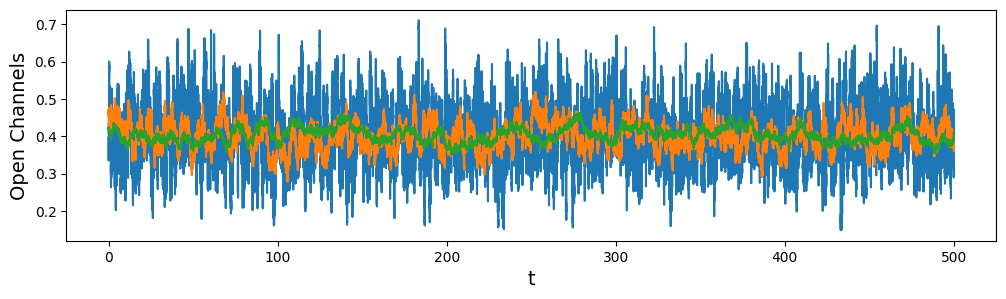

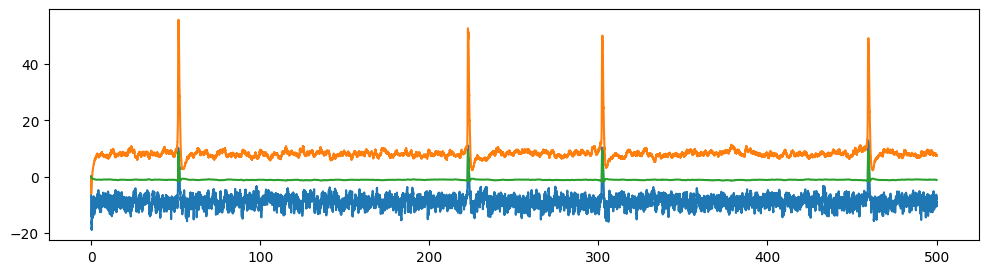

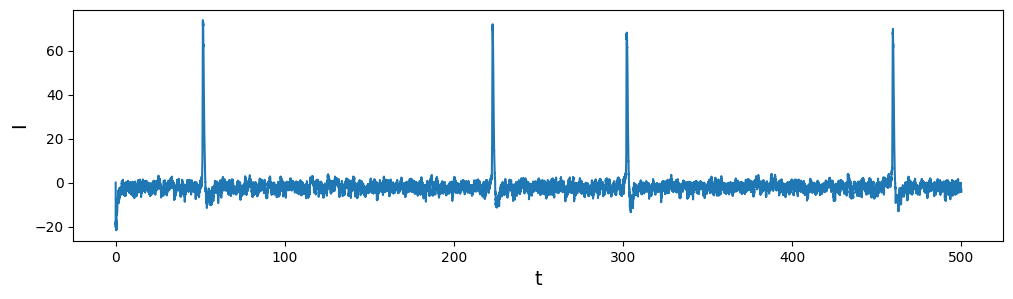

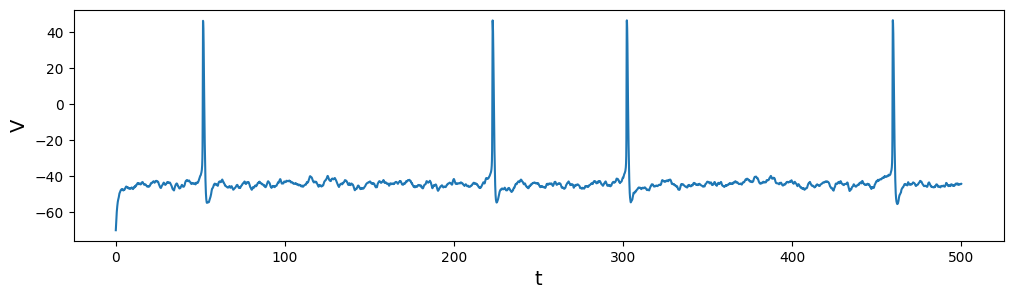

In [ ]:
t_max = 500
delta_t = 0.01
T = np.arange(0.,t_max,delta_t)
n_t = len(T)

gL = 0.05;
gNa = 50;
gK = 50;
VNa = 50;
VK = -90;
VL = -70;
VAMPA = 0;
VGABA = -60
Iinj = 0;
gAMPA = 0.5  # [mS.cm-2]
gGABA = 1.3 #
gNMDA = 0.5

n_Ext_AMPA = 8000
f_Ext_AMPA = 5
tau_Decay_AMPA = 3
tau_Decay_NMDA = 50
delta_x = 0.1

n_Ext_GABA = 2000 # Number of Excitatory Neurons
f_Ext_GABA = 20 # Feed-Forward Excitatory Frequency [Hz]
tau_Decay_GABA = 15

x_FF_AMPA = function_stochastic_synapse(n_Ext_AMPA, f_Ext_AMPA, tau_Decay_AMPA, n_t, delta_x)
x_FF_NMDA = function_stochastic_synapse(n_Ext_AMPA, f_Ext_AMPA, tau_Decay_NMDA, n_t, delta_x)
x_FF_GABA = function_stochastic_synapse(n_Ext_GABA, f_Ext_GABA, tau_Decay_GABA, n_t, delta_x)

plt.figure(figsize=[12,3])
plt.plot(T,x_FF_AMPA)
plt.plot(T,x_FF_GABA)
plt.plot(T,x_FF_NMDA)

plt.xlabel('t', fontsize = 14)
plt.ylabel('Open Channels', fontsize = 14)

I_AMPA = np.zeros((int(n_t),))
I_GABA = np.zeros((int(n_t),))
I_NMDA = np.zeros((int(n_t),))
I_Na = np.zeros((int(n_t),))
I_K = np.zeros((int(n_t),))
I_L = np.zeros((int(n_t),))

V = np.zeros((int(n_t),))-70
P = np.zeros((int(n_t),))
m = np.zeros((int(n_t),))
h = np.zeros((int(n_t),))
n = np.zeros((int(n_t),))

for kt in range(1,int(n_t)):
        I_AMPA[kt] = gAMPA*x_FF_AMPA[kt-1]*(V[kt-1]-VAMPA)
        I_GABA[kt] = gGABA*x_FF_GABA[kt-1]*(V[kt-1]-VGABA)
        MgNmda = (1/(1 + np.exp(-(V[kt-1]+14)/16)))
        I_NMDA[kt] = gNMDA*MgNmda*x_FF_NMDA[kt-1]*(V[kt-1]-VAMPA)

        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)

        deltaV = -I_L[kt]- I_AMPA[kt] - I_GABA[kt]- I_Na[kt] - I_K[kt] + Iinj #
        V[kt] = V[kt-1] + deltaV*delta_t #

        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*delta_t
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*delta_t
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*delta_t

plt.figure(figsize=[12,3])
plt.plot(T,I_AMPA)
plt.plot(T,I_GABA)
plt.plot(T,I_NMDA)

plt.figure(figsize=[12,3])
plt.plot(T,I_AMPA+I_GABA+I_NMDA)

plt.xlabel('t', fontsize = 14)
plt.ylabel('I', fontsize = 14)


plt.figure(figsize=[12,3])
plt.plot(T,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)
plt.show()

muV = np.mean(I_AMPA+I_GABA)
sigmaV = np.std(I_AMPA+I_GABA)


Let's compare such conductance noise with other models of synaptic noise (current or voltage noise):

"Voltage" noise can be modelled as an Ornstein-Uhlenbeck process:

\begin{equation}
C \frac{dV}{dt} = -(g_{leak}(V(t)-V_{leak})) - \zeta(t)
\end{equation}

which can be simulated by:
\begin{equation}
dV = -(g_{leak}(V(t)-V_{leak})) dt/C- (\mu + \sigma y) \sqrt{dt}
\end{equation}
where y is drawn from a Gaussian (0,1) distribution.



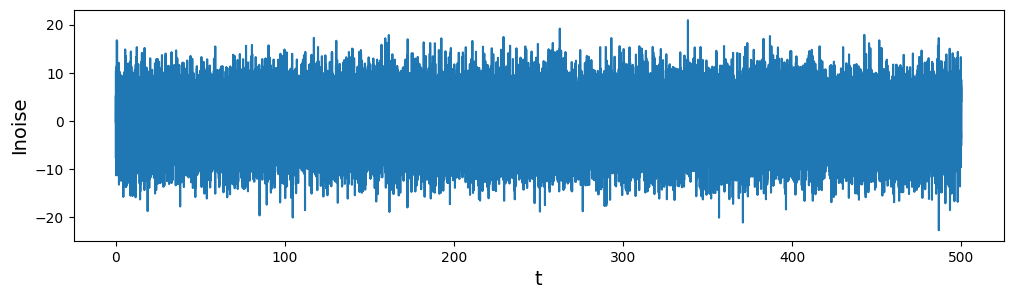

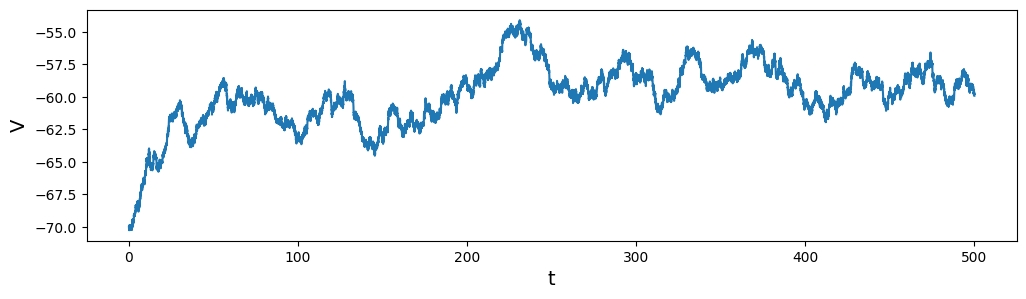

In [ ]:
delta = 0.01 # definition of Delta t
t_max = 500  # Maximal length of integration - final time
nt = t_max/delta;

time = np.arange(0,t_max,delta)

gL = 0.05;
gNa = 50;
gK = 50;
VNa = 50;
VK = -90;
VL = -70;
VAMPA = 0;
VGABA = -60
Iinj = 0;

I_Na = np.zeros((int(nt),1))
I_K = np.zeros((int(nt),1))
I_L = np.zeros((int(nt),1))
Inoise = np.zeros((int(nt),1))

V = np.zeros((int(nt),1))-70
P = np.zeros((int(nt),1))
m = np.zeros((int(nt),1))
h = np.zeros((int(nt),1))
n = np.zeros((int(nt),1))

for kt in range(1,int(nt)):

        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)
        Inoise[kt] = muV+sigmaV*np.random.randn(1)
        V[kt] = V[kt-1] + (-I_L[kt] - I_Na[kt] - I_K[kt] + Iinj -Inoise[kt])*delta
        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*delta
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*delta
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*delta


plt.figure(figsize=[12,3])
plt.plot(time,Inoise)
plt.xlabel('t', fontsize = 14)
plt.ylabel('Inoise', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)
plt.show()

What do we observe ? Why ?
How can we fix this ?

Random voltage noise is integrated by membrane voltage time constant but the noise term itself is a white noise (at each time point it is independant from the preceding values)

"Current" noise (or colored noised can be modelled by integrating this equation:

\begin{equation}
\tau_{syn} \frac{dI_{noise}}{dt} = -I{noise} + \zeta(t)
\end{equation}

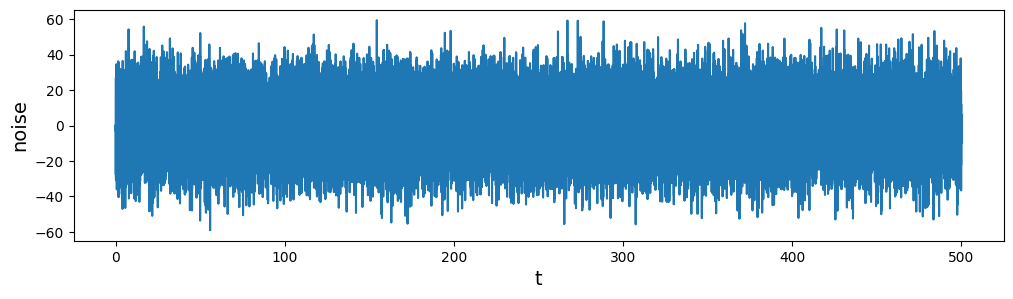

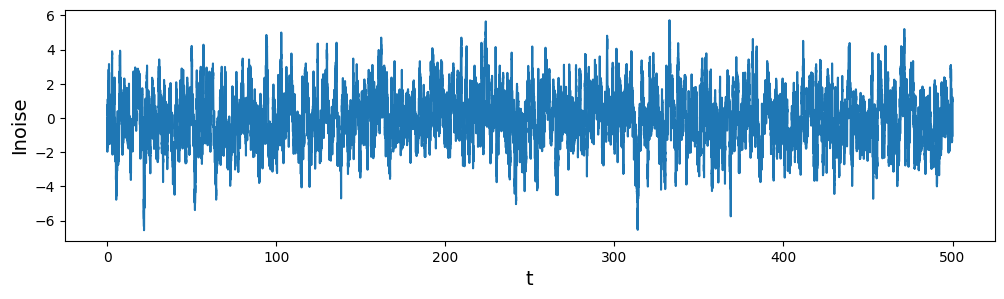

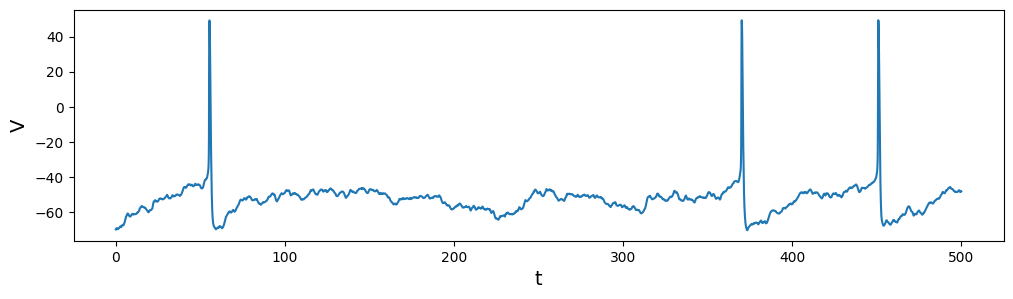

In [ ]:
delta = 0.01 # definition of Delta t
t_max = 500  # Maximal length of integration - final time
nt = t_max/delta;
time = np.arange(0,t_max,delta)

tau_syn = 0.5
I_noise = np.zeros((int(nt),1))
noiseterm = np.zeros((int(nt),1))

I_Na = np.zeros((int(nt),1))
I_K = np.zeros((int(nt),1))
I_L = np.zeros((int(nt),1))
noiseterm = np.zeros((int(nt),1))
Inoise = np.zeros((int(nt),1))

V = np.zeros((int(nt),1))-70
P = np.zeros((int(nt),1))
m = np.zeros((int(nt),1))
h = np.zeros((int(nt),1))
n = np.zeros((int(nt),1))

for kt in range(1,int(nt)):

        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)
        noiseterm[kt]  = 15*np.random.randn(1)
        Inoise[kt] = Inoise[kt-1] + (dt/tau_syn)* (-Inoise[kt-1]+noiseterm[kt] )
        V[kt] = V[kt-1] + (-I_L[kt] - I_Na[kt] - I_K[kt] + Iinj - (-1+Inoise[kt]))*delta
        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*delta
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*delta
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*delta

plt.figure(figsize=[12,3])
plt.plot(time,noiseterm)
plt.xlabel('t', fontsize = 14)
plt.ylabel('noise', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,Inoise)
plt.xlabel('t', fontsize = 14)
plt.ylabel('Inoise', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)
plt.show()



**4 : Bonus : Hindmarsh-Rose model versus FitzHugh Nagumo versus generalized HH model**

FitzHugh Nagumo:
- 2-dimensional, cool for geomtric analyses
- no link between variables and biophysical entities

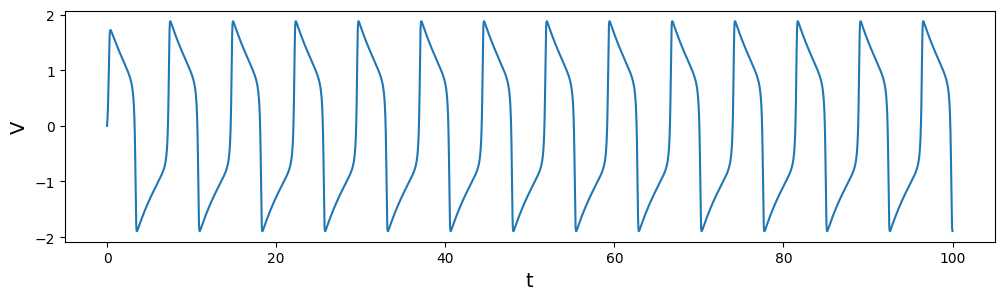

In [ ]:
dt = 0.1 # definition of Delta t
t_max = 100  # Maximal length of integration - final time
nt = t_max/delta;
time = np.arange(0,t_max,delta)

epsilon   = 0.05
I_ext = 0.2 # 0.01 #
a     = -0.3
b     = 1.4

V = np.zeros((int(nt),1))
W = np.zeros((int(nt),1))

for kt in range(1,int(nt)):

    dV = V[kt-1] - (V[kt-1]*V[kt-1]*V[kt-1])/3 - W[kt-1] + I_ext
    dW = epsilon*(V[kt-1]- a - b*W[kt-1])
    V[kt] = V[kt-1]+dV*dt
    W[kt] = W[kt-1]+dW*dt


plt.figure(figsize=[12,3])
plt.plot(time,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)
plt.show()


Hindmarsh-Rose:
- 3-dimensional, reproduce a lot of firing pattern(bursting and chaos)
- x is a dimensionless analogue of V, but y and z are not related to biophysical entities
- can give weird behavior if badly parameterized

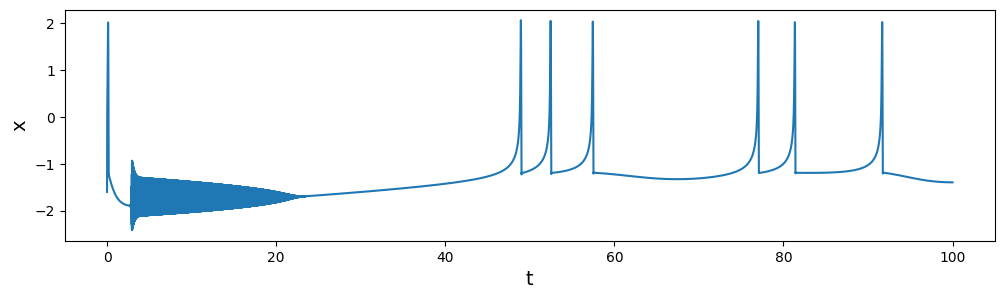

In [ ]:
dt = 0.1 # definition of Delta t
t_max = 100  # Maximal length of integration - final time
nt = t_max/delta;
time = np.arange(0,t_max,delta)

a = 1.0;
b = 3.0;
c = 1.0;
d = 5.0;
s = 4.0;

r = 0.001;
xR = -1.6;
I = 2;

x = np.zeros((int(nt),1))-1.6
y = np.zeros((int(nt),1))+4.0
z = np.zeros((int(nt),1))+2.75

for kt in range(1,int(nt)):

  dx = (y[kt-1] + (b * x[kt-1] * x[kt-1]) - (a * x[kt-1] * x[kt-1] * x[kt-1]) - z[kt-1] + I)
  x[kt] = x[kt-1]+dx*dt
  dy = (c - (5 * x[kt-1] * x[kt-1]) - y[kt-1])
  y[kt] = y[kt-1]+dy*dt
  dz = (r * (s * (x[kt-1] - xR) - z[kt-1]))
  z[kt] = z[kt-1]+dz*dt


plt.figure(figsize=[12,3])
plt.plot(time,x)
plt.xlabel('t', fontsize = 14)
plt.ylabel('x', fontsize = 14)
plt.show()


Generalized Hodgkin-Huxley:
- original Hodgkin-Huxley can only reproduce regular firing
- adding voltage-gated conductances can reproduce any pattern
- parameters need to be carefully fit on data
- way more ODEs than F-N and H-M models

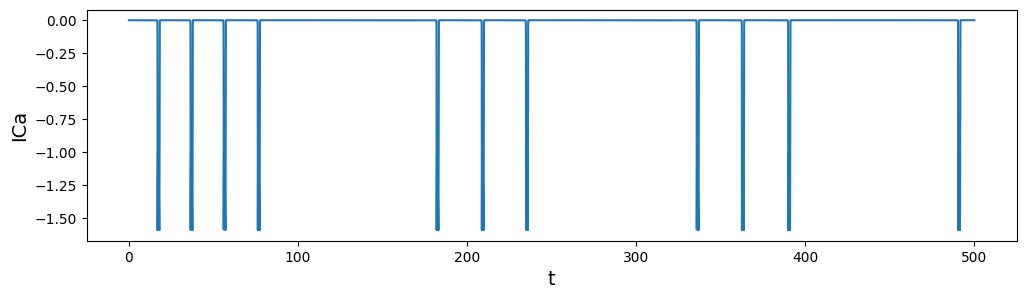

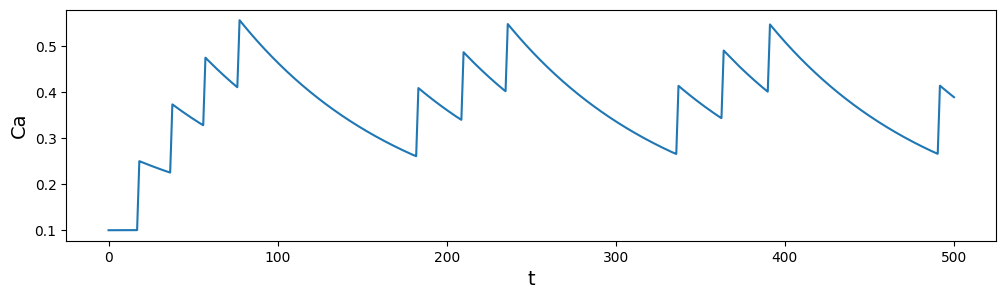

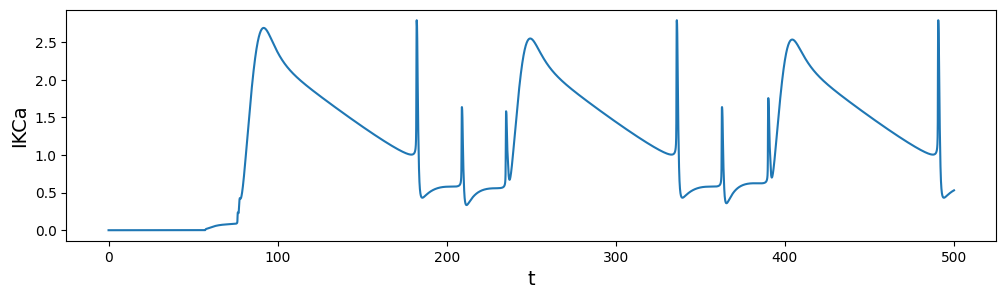

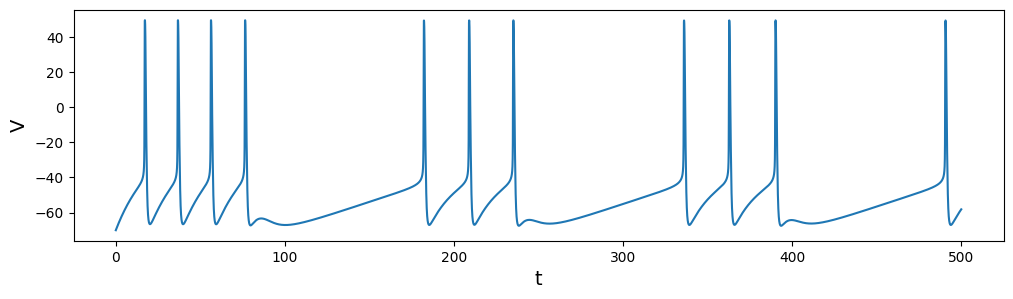

In [ ]:
delta = 0.01 # definition of Delta t
t_max = 500  # Maximal length of integration - final time
nt = t_max/delta;
time = np.arange(0,t_max,delta)


gL = 0.05;
gNa = 50;
gK = 50;
VNa = 50;
VK = -90;
VL = -70;
VAMPA = 0;
VGABA = -60
Iinj = 2.5;

# Calcium current and dynamics
gCa = 0.01
VCa = 150
VCa_half = -20
sVCa = 2
Ca_inf=0.1
Ca_tau=100
betaCa = 0.1

# --- SK-type channel ---
KCa_half = 0.5
sKCa = 0.01
KCatau= 50
gKCa = 0.5

# --- CAN-type channel ---
CAN_half=0.5
sCAN = 0.2
CANtau= 20
VCAN = 0
gCAN = 0.02

I_Na = np.zeros((int(nt),1))
I_K = np.zeros((int(nt),1))
I_L = np.zeros((int(nt),1))
I_Ca = np.zeros((int(nt),1))
I_KCa = np.zeros((int(nt),1))
I_CAN = np.zeros((int(nt),1))

V = np.zeros((int(nt),1))-70
Ca = np.zeros((int(nt),1))+Ca_inf
xCa= np.zeros((int(nt),1))
xK = np.zeros((int(nt),1))
xCAN = np.zeros((int(nt),1))
m = np.zeros((int(nt),1))
h = np.zeros((int(nt),1))
n = np.zeros((int(nt),1))

for kt in range(1,int(nt)):

        xCa[kt] = 1/(1+np.exp(-(V[kt-1]-VCa_half)/sVCa))
        I_Ca[kt] = gCa*xCa[kt]*(V[kt-1]-VCa)
        Ca[kt] = Ca[kt-1] - ((Ca[kt-1]-Ca_inf)/Ca_tau + betaCa*I_Ca[kt])*delta

        I_Na[kt] = gNa*m[kt-1]*m[kt-1]*m[kt-1]*h[kt-1]*(V[kt-1]-VNa)
        I_K[kt] = gK*n[kt-1]*n[kt-1]*n[kt-1]*n[kt-1]*(V[kt-1]-VK)
        I_L[kt] = gL*(V[kt-1]-VL)
        I_KCa[kt] = gKCa*xK[kt-1]*(V[kt-1]-VK)
        #I_CAN[kt] = gCAN*xCAN[kt-1]*(V[kt-1]-VCAN)

        V[kt] = V[kt-1] + (-I_L[kt] - I_Na[kt] - I_K[kt] - I_KCa[kt] + Iinj)*delta #- I_CAN[kt] - I_Ca[kt]
        m[kt] = m[kt-1] + (alpha_m(V[kt])*(1-m[kt-1]) - beta_m(V[kt])*m[kt-1])*delta
        h[kt] = h[kt-1] + (alpha_h(V[kt])*(1-h[kt-1]) - beta_h(V[kt])*h[kt-1])*delta
        n[kt] = n[kt-1] + (alpha_n(V[kt])*(1-n[kt-1]) - beta_n(V[kt])*n[kt-1])*delta

        xK[kt] = xK[kt-1] + (1/(1+np.exp(-(Ca[kt]-KCa_half)/sKCa)) - xK[kt-1])*delta/KCatau
       # xCAN[kt] = xCAN[kt-1] + (1/(1+np.exp(-(Ca[kt]-CAN_half)/sCAN)) - xCAN[kt-1])*delta/CANtau


plt.figure(figsize=[12,3])
plt.plot(time,I_Ca)
plt.xlabel('t', fontsize = 14)
plt.ylabel('ICa', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,Ca)
plt.xlabel('t', fontsize = 14)
plt.ylabel('Ca', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,I_KCa)
plt.xlabel('t', fontsize = 14)
plt.ylabel('IKCa', fontsize = 14)
plt.show()

plt.figure(figsize=[12,3])
plt.plot(time,V)
plt.xlabel('t', fontsize = 14)
plt.ylabel('V', fontsize = 14)
plt.show()

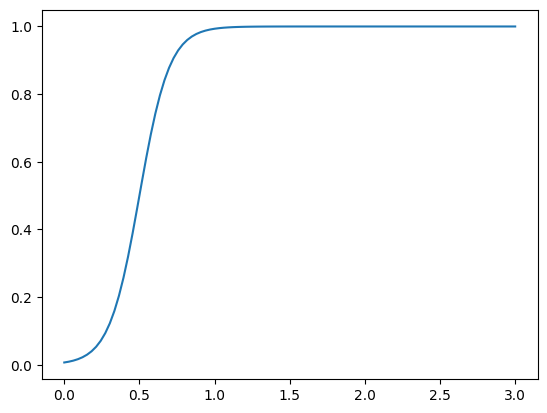

In [ ]:
Caall = np.linspace(0,3,100)
KCa = 1/(1+np.exp(-(Caall-0.5)/0.1))
plt.plot(Caall,KCa)
